# Spam Mail Detection

### Type of problem: Classification 

#### Importing Required Libraries

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [109]:
df=pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [110]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [111]:
df.shape

(5572, 2)

In [112]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [113]:
df.Category.unique()

array(['ham', 'spam'], dtype=object)

In [114]:
df['Spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df['Ham']=df['Category'].apply(lambda x:1 if x== 'ham' else 0)

In [115]:
df.head(10)

,Category,Message,Spam,Ham
0,ham,"Go until jurong point, crazy.. Available only ...",0,1
1,ham,Ok lar... Joking wif u oni...,0,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,0
3,ham,U dun say so early hor... U c already then say...,0,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,0
6,ham,Even my brother is not like to speak with me. ...,0,1
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,1
8,spam,WINNER!! As a valued network customer you have...,1,0
9,spam,Had your mobile 11 months or more? U R entitle...,1,0


<AxesSubplot:xlabel='Category', ylabel='count'>

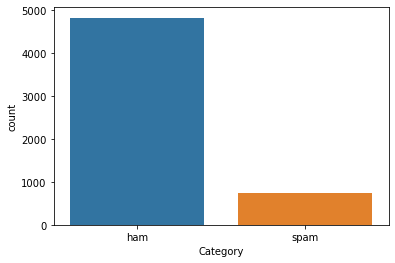

In [116]:
sns.countplot(x='Category',data=df)

In [117]:
df['Spam'].sum()

747

In [118]:
df['Ham'].sum()

4825

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.2, random_state=42)

In [120]:
x_train

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 4457, dtype: object

In [121]:
len(x_train)

4457

In [122]:
x_test

3245    Squeeeeeze!! This is christmas hug.. If u lik ...
944     And also I've sorta blown him off a couple tim...
1044    Mmm thats better now i got a roast down me! i...
2484        Mm have some kanji dont eat anything heavy ok
812     So there's a ring that comes with the guys cos...
                              ...                        
4264    Den only weekdays got special price... Haiz......
2439         I not busy juz dun wan 2 go so early.. Hee..
5556    Yes i have. So that's why u texted. Pshew...mi...
4205    How are you enjoying this semester? Take care ...
4293                                                G.W.R
Name: Message, Length: 1115, dtype: object

In [123]:
len(x_test)

1115

In [124]:
y_test

3245    0
944     0
1044    0
2484    0
812     0
       ..
4264    0
2439    0
5556    0
4205    0
4293    0
Name: Spam, Length: 1115, dtype: int64

In [125]:
from sklearn.feature_extraction.text import CountVectorizer 
v=CountVectorizer()
X=cv_messages=v.fit_transform(x_train.values)
cv_messages.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [126]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()

In [127]:
model.fit(X,y_train)

MultinomialNB()

In [128]:
model = LogisticRegression()
model.fit(X,y_train)

LogisticRegression()

In [131]:
prediction_on_training_data = model.predict(X)
accuracy_on_test_data = accuracy_score(y_train, prediction_on_training_data)

In [132]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.99798070450976


## Sklearn Pipeline Method

In [146]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [147]:
clf.predict(Email)

array([0], dtype=int64)

In [148]:
clf.score(x_test,y_test)

0.9919282511210762

## Create and dump Model file 

In [153]:
import joblib 
joblib.dump(clf,'Spam_mail_Detector.pkl')

['Spam_mail_Detector.pkl']

In [154]:
Email = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors

input_data_features = v.transform(Email)

# making prediction

Output_prediction = model.predict(input_data_features)
print(Output_prediction)


if (Output_prediction[0]==0):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Ham mail
